In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('dataset_malwares.csv')

In [ ]:
data.head()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19611 entries, 0 to 19610
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          19611 non-null  object 
 1   e_magic                       19611 non-null  int64  
 2   e_cblp                        19611 non-null  int64  
 3   e_cp                          19611 non-null  int64  
 4   e_crlc                        19611 non-null  int64  
 5   e_cparhdr                     19611 non-null  int64  
 6   e_minalloc                    19611 non-null  int64  
 7   e_maxalloc                    19611 non-null  int64  
 8   e_ss                          19611 non-null  int64  
 9   e_sp                          19611 non-null  int64  
 10  e_csum                        19611 non-null  int64  
 11  e_ip                          19611 non-null  int64  
 12  e_cs                          19611 non-null  int64  
 13  e

<ipython-input-10-db18ad2afb99>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-10-db18ad2afb99>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

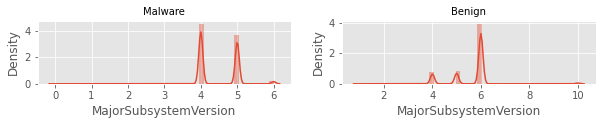

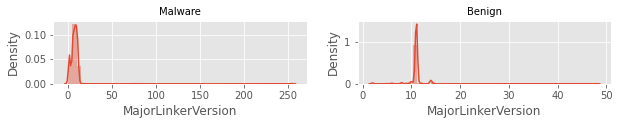

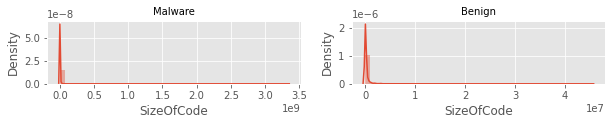

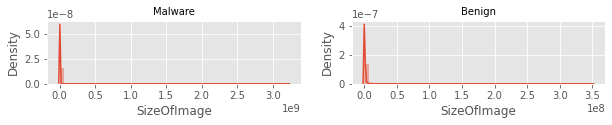

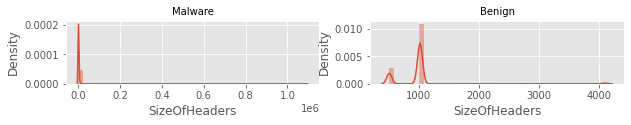

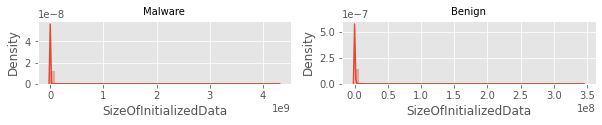

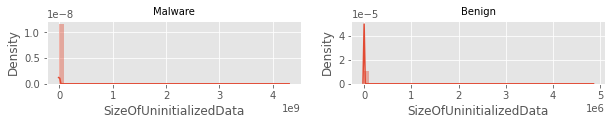

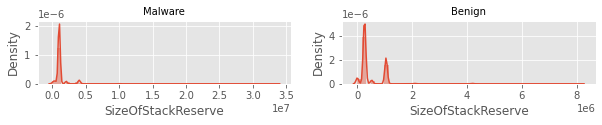

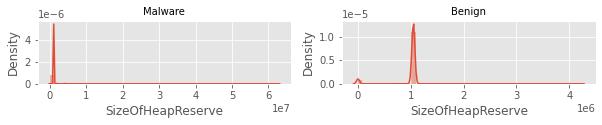

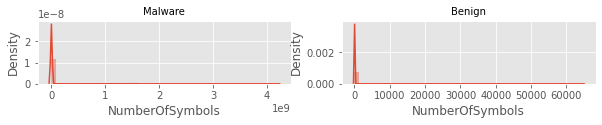

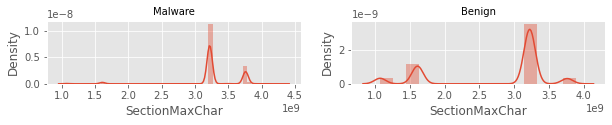

In [ ]:
features = ['MajorSubsystemVersion', 'MajorLinkerVersion', 'SizeOfCode', 'SizeOfImage', 'SizeOfHeaders', 'SizeOfInitializedData',
           'SizeOfUninitializedData', 'SizeOfStackReserve', 'SizeOfHeapReserve',
            'NumberOfSymbols', 'SectionMaxChar']
i=1

for feature in features:
    plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(len(features), 2, i)
    sns.distplot(data[data['Malware']==1][feature], ax=ax1, kde_kws={'bw': 0.1})
    ax1.set_title(f'Malware', fontsize=10)
    ax2 = plt.subplot(len(features), 2, i+1)
    sns.distplot(data[data['Malware']==0][feature], ax=ax2, kde_kws={'bw': 0.1})
    ax2.set_title(f'Benign', fontsize=10)
    i= i+2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['Malware'], test_size=0.2, random_state=0)

In [ ]:
print(f'Number of used features is {X_train.shape[1]}')

Number of used features is 75


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0,
                         oob_score = True,
                         max_depth = 16)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=16, oob_score=True, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malware']))

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97      1004
     Malware       0.99      1.00      0.99      2919

    accuracy                           0.99      3923
   macro avg       0.99      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



Text(33.0, 0.5, 'True labels')

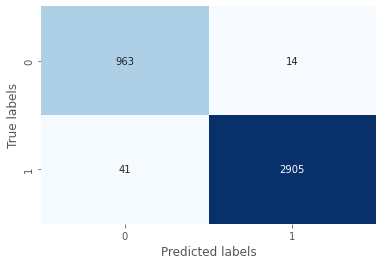

In [ ]:
ax=sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

In [ ]:
pkl_filename = "rf_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfc, file)

Text(0.5, 1.0, 'Features importance')

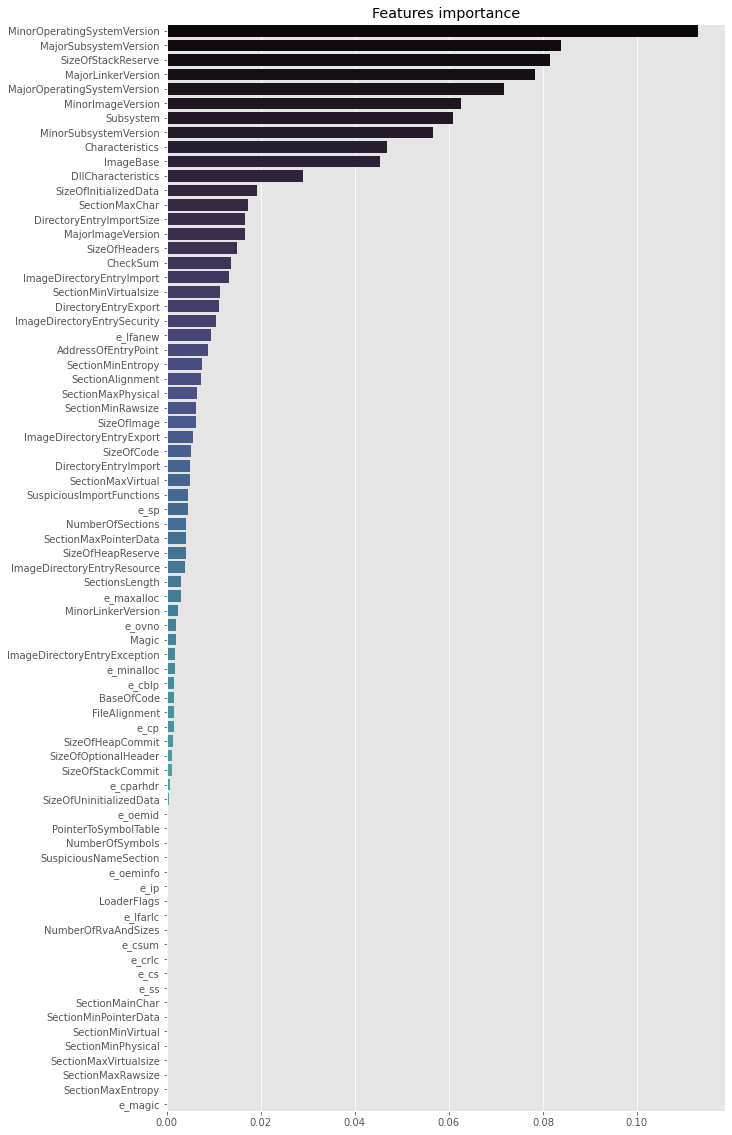

In [ ]:
importance = rfc.feature_importances_
importance_dict = {used_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')